In [3]:
import os
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random
from pennylane import numpy as np
from tqdm import tqdm
#from qbmqsp.qbm import QBM
from qbmqsp.utils import construct_multi_fcqbm_pauli_strings

from qbmqsp.src.utils import import_dataset, split_dataset_labels, split_data
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
                             precision_score, recall_score)
import scipy.linalg as spl

import pennylane as qml
from pennylane import numpy as np
from pennylane.pauli.utils import string_to_pauli_word


from qbmqsp.gate_qbm import evaluate_qbm,QBM,plot_pixel_dataset

from functools import partial

import itertools


ModuleNotFoundError: No module named 'qbmqsp'

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


### The 3 qubit interaction hamiltonian

In [2]:
def generate_pauli_strings_tfim(num_qubits,n_visible,restricted=False,multiple=False):
    """
    Generate Pauli strings for Ising model as a 
    boltzmann machine .
    
    Parameters:
    num_qubits (int): Number of qubits in the quantum Boltzmann machine.
    n_visible (int): Number if visible units.
    restricted(bool) : (False) for unrestricted boltzmann machine
    multiple(bool): (False) Set true for 3-qubit interaction
    
    Returns:
    list: List of Pauli strings representing the Hamiltonian.
    """
    pauli_strings = []

    # Local transverse field terms (X_i)
    for i in range(num_qubits):
        pauli_string = ['I'] * num_qubits
        pauli_string[i] = 'Z'
        pauli_strings.append(''.join(pauli_string))

    # Interaction terms (Z_i Z_j)
    
 
    
    
    
    

    for i, j in itertools.combinations(range(num_qubits), 2):
        if restricted:
            if i<n_visible and j>=n_visible:
                pauli_string = ['I'] * num_qubits
    
                pauli_string[i] = 'Z'
                pauli_string[j] = 'Z'
                pauli_strings.append(''.join(pauli_string))
        else:
            if i<n_visible:
                
                pauli_string = ['I'] * num_qubits
                
                pauli_string[i] = 'Z'
                pauli_string[j] = 'Z'
                   
                pauli_strings.append(''.join(pauli_string)) 

    if multiple:
        
        for i,j,k in itertools.combinations(range(num_qubits), 3):
        
            if restricted:
                if i<n_visible and j>=n_visible:
                    pauli_string = ['I'] * num_qubits
        
                    pauli_string[i] = 'Z'
                    pauli_string[j] = 'Z'
                    pauli_strings.append(''.join(pauli_string))
            else:
                
                if i<n_visible and j<n_visible and k<n_visible:
                    
                    
                    pauli_string = ['I'] * num_qubits
                    
                    pauli_string[i] = 'Z'
                    pauli_string[j] = 'Z'
                    pauli_string[k] ='Z'  
                    pauli_strings.append(''.join(pauli_string))         
        
        for i,j,k in itertools.combinations(range(num_qubits), 3):
        
            if i<n_visible and j<n_visible and k>=n_visible:
                
                
                pauli_string = ['I'] * num_qubits
                
                pauli_string[i] = 'Z'
                pauli_string[j] = 'Z'
                pauli_string[k] ='Z'  
                pauli_strings.append(''.join(pauli_string))   
    
    return pauli_strings

generate_pauli_strings_tfim(9,8,False,True)   

['ZIIIIIIII',
 'IZIIIIIII',
 'IIZIIIIII',
 'IIIZIIIII',
 'IIIIZIIII',
 'IIIIIZIII',
 'IIIIIIZII',
 'IIIIIIIZI',
 'IIIIIIIIZ',
 'ZZIIIIIII',
 'ZIZIIIIII',
 'ZIIZIIIII',
 'ZIIIZIIII',
 'ZIIIIZIII',
 'ZIIIIIZII',
 'ZIIIIIIZI',
 'ZIIIIIIIZ',
 'IZZIIIIII',
 'IZIZIIIII',
 'IZIIZIIII',
 'IZIIIZIII',
 'IZIIIIZII',
 'IZIIIIIZI',
 'IZIIIIIIZ',
 'IIZZIIIII',
 'IIZIZIIII',
 'IIZIIZIII',
 'IIZIIIZII',
 'IIZIIIIZI',
 'IIZIIIIIZ',
 'IIIZZIIII',
 'IIIZIZIII',
 'IIIZIIZII',
 'IIIZIIIZI',
 'IIIZIIIIZ',
 'IIIIZZIII',
 'IIIIZIZII',
 'IIIIZIIZI',
 'IIIIZIIIZ',
 'IIIIIZZII',
 'IIIIIZIZI',
 'IIIIIZIIZ',
 'IIIIIIZZI',
 'IIIIIIZIZ',
 'IIIIIIIZZ',
 'ZZZIIIIII',
 'ZZIZIIIII',
 'ZZIIZIIII',
 'ZZIIIZIII',
 'ZZIIIIZII',
 'ZZIIIIIZI',
 'ZIZZIIIII',
 'ZIZIZIIII',
 'ZIZIIZIII',
 'ZIZIIIZII',
 'ZIZIIIIZI',
 'ZIIZZIIII',
 'ZIIZIZIII',
 'ZIIZIIZII',
 'ZIIZIIIZI',
 'ZIIIZZIII',
 'ZIIIZIZII',
 'ZIIIZIIZI',
 'ZIIIIZZII',
 'ZIIIIZIZI',
 'ZIIIIIZZI',
 'IZZZIIIII',
 'IZZIZIIII',
 'IZZIIZIII',
 'IZZIIIZII',
 'IZZIIIIZI',
 'IZIZ

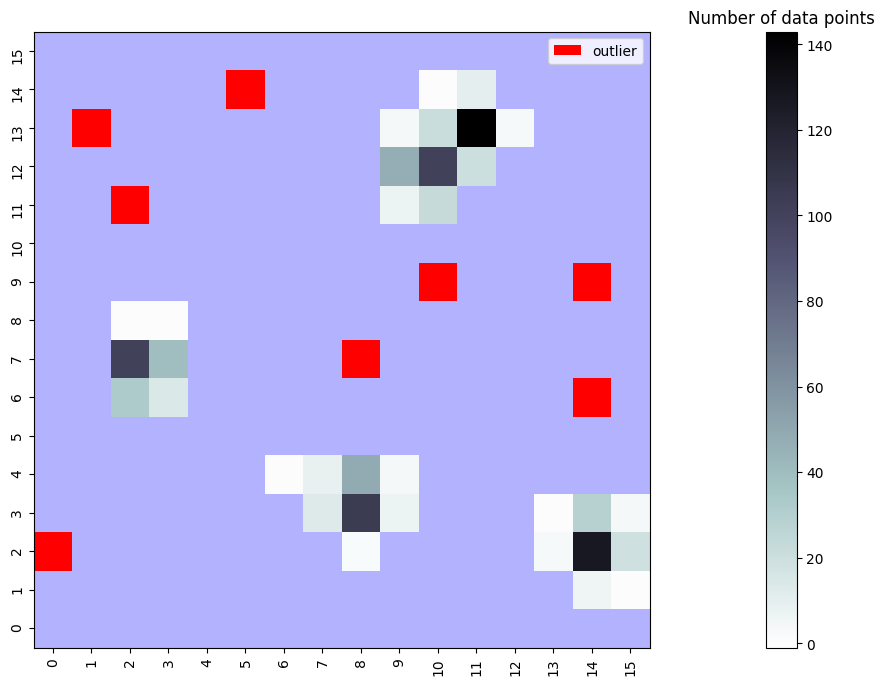

In [3]:



#Loading the Dataset


CLUSTER=5
PATH= '../../datasets/good_datasets/l_o8_c5_d2_v0.35_p190_4.npy'
np.random.seed(seed=3)
random.seed(3)
#dev_name='qiskit.ibmq'
data = import_dataset(PATH)


training_dataset, testing_dataset = split_data(data, CLUSTER)
training_data, training_labels = split_dataset_labels(training_dataset)
testing_data,testing_labels=split_dataset_labels(testing_dataset)

plot_pixel_dataset(data,CLUSTER)



In [4]:


import numpy
#training_data=numpy.expand_dims(training_data[:,0],axis=1)
#training_data=training_data[0::]
n_hidden_units=0
n_visible=8
n_qubits = n_visible+n_hidden_units

restricted=False
multiple=True
h = generate_pauli_strings_tfim(n_qubits,n_visible,restricted,multiple)
print('Hamiltonian .... \n')
print(h)
print('\n.... ')
nparams = len(h)


θ_init =np.random.rand(nparams)/nparams #np.loadtxt('./weights_7_3_un.txt')
enc = 'general'
δ = 0.3
polydeg = 10
β = 1.8467804429088952
learning_rate = 0.2187183103085994

epochs = 1


dev_name='default.qubit'
#dev_name='lightning.qubit'



batch_size=53

seed=121




np.random.seed(seed)
random.seed(seed)
    
training_dataset, testing_dataset = split_data(data, CLUSTER)


training_data, training_labels = split_dataset_labels(training_dataset)


testing_data,testing_labels=split_dataset_labels(testing_dataset)


θ_init =np.random.rand(nparams)/nparams #np.loadtxt('./weights_7_3_un.txt')


qbm = QBM(training_data,h, θ_init, enc, δ, polydeg, β,n_hidden_units,epochs,restricted,multiple=multiple)

errors,weights=qbm.train_model(batch_size,learning_rate)




Hamiltonian .... 

['ZIIIIIII', 'IZIIIIII', 'IIZIIIII', 'IIIZIIII', 'IIIIZIII', 'IIIIIZII', 'IIIIIIZI', 'IIIIIIIZ', 'ZZIIIIII', 'ZIZIIIII', 'ZIIZIIII', 'ZIIIZIII', 'ZIIIIZII', 'ZIIIIIZI', 'ZIIIIIIZ', 'IZZIIIII', 'IZIZIIII', 'IZIIZIII', 'IZIIIZII', 'IZIIIIZI', 'IZIIIIIZ', 'IIZZIIII', 'IIZIZIII', 'IIZIIZII', 'IIZIIIZI', 'IIZIIIIZ', 'IIIZZIII', 'IIIZIZII', 'IIIZIIZI', 'IIIZIIIZ', 'IIIIZZII', 'IIIIZIZI', 'IIIIZIIZ', 'IIIIIZZI', 'IIIIIZIZ', 'IIIIIIZZ', 'ZZZIIIII', 'ZZIZIIII', 'ZZIIZIII', 'ZZIIIZII', 'ZZIIIIZI', 'ZZIIIIIZ', 'ZIZZIIII', 'ZIZIZIII', 'ZIZIIZII', 'ZIZIIIZI', 'ZIZIIIIZ', 'ZIIZZIII', 'ZIIZIZII', 'ZIIZIIZI', 'ZIIZIIIZ', 'ZIIIZZII', 'ZIIIZIZI', 'ZIIIZIIZ', 'ZIIIIZZI', 'ZIIIIZIZ', 'ZIIIIIZZ', 'IZZZIIII', 'IZZIZIII', 'IZZIIZII', 'IZZIIIZI', 'IZZIIIIZ', 'IZIZZIII', 'IZIZIZII', 'IZIZIIZI', 'IZIZIIIZ', 'IZIIZZII', 'IZIIZIZI', 'IZIIZIIZ', 'IZIIIZZI', 'IZIIIZIZ', 'IZIIIIZZ', 'IIZZZIII', 'IIZZIZII', 'IIZZIIZI', 'IIZZIIIZ', 'IIZIZZII', 'IIZIZIZI', 'IIZIZIIZ', 'IIZIIZZI', 'IIZIIZIZ', 'IIZIIIZ

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.43s/it]


Outlier threshold:  -2.066905177319815
Calculate outlier Energy


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 184.36it/s]


Calculate cluster energy


100%|███████████████████████████████████████████████████████████████████████████████| 475/475 [00:01<00:00, 452.73it/s]
C:\Users\ge84gac\Gate_qbm\qbmqsp\gate_qbm.py:123: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=testing_data[:,0][testing_labels>lab],y=testing_data[:,1][testing_labels>lab], c='r',palette='coolwarm')


Outlier classification: Results...
Predicted points test:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 

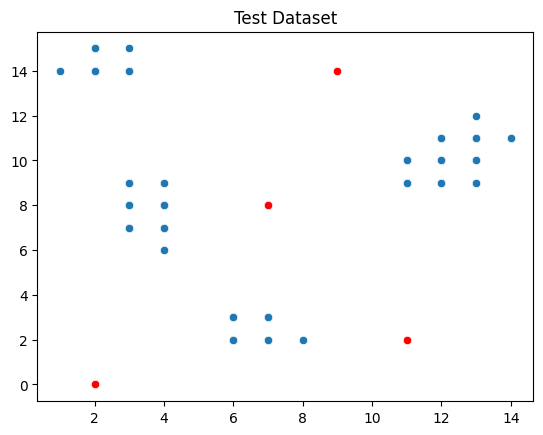

In [5]:
p,r,f1,energy_data=evaluate_qbm(qbm,testing_dataset,CLUSTER,plot=True,quantile=0.95,method='mean')

## Circuit Diagram for the QSP layers

(<Figure size 6000x1900 with 1 Axes>, <Axes: >)

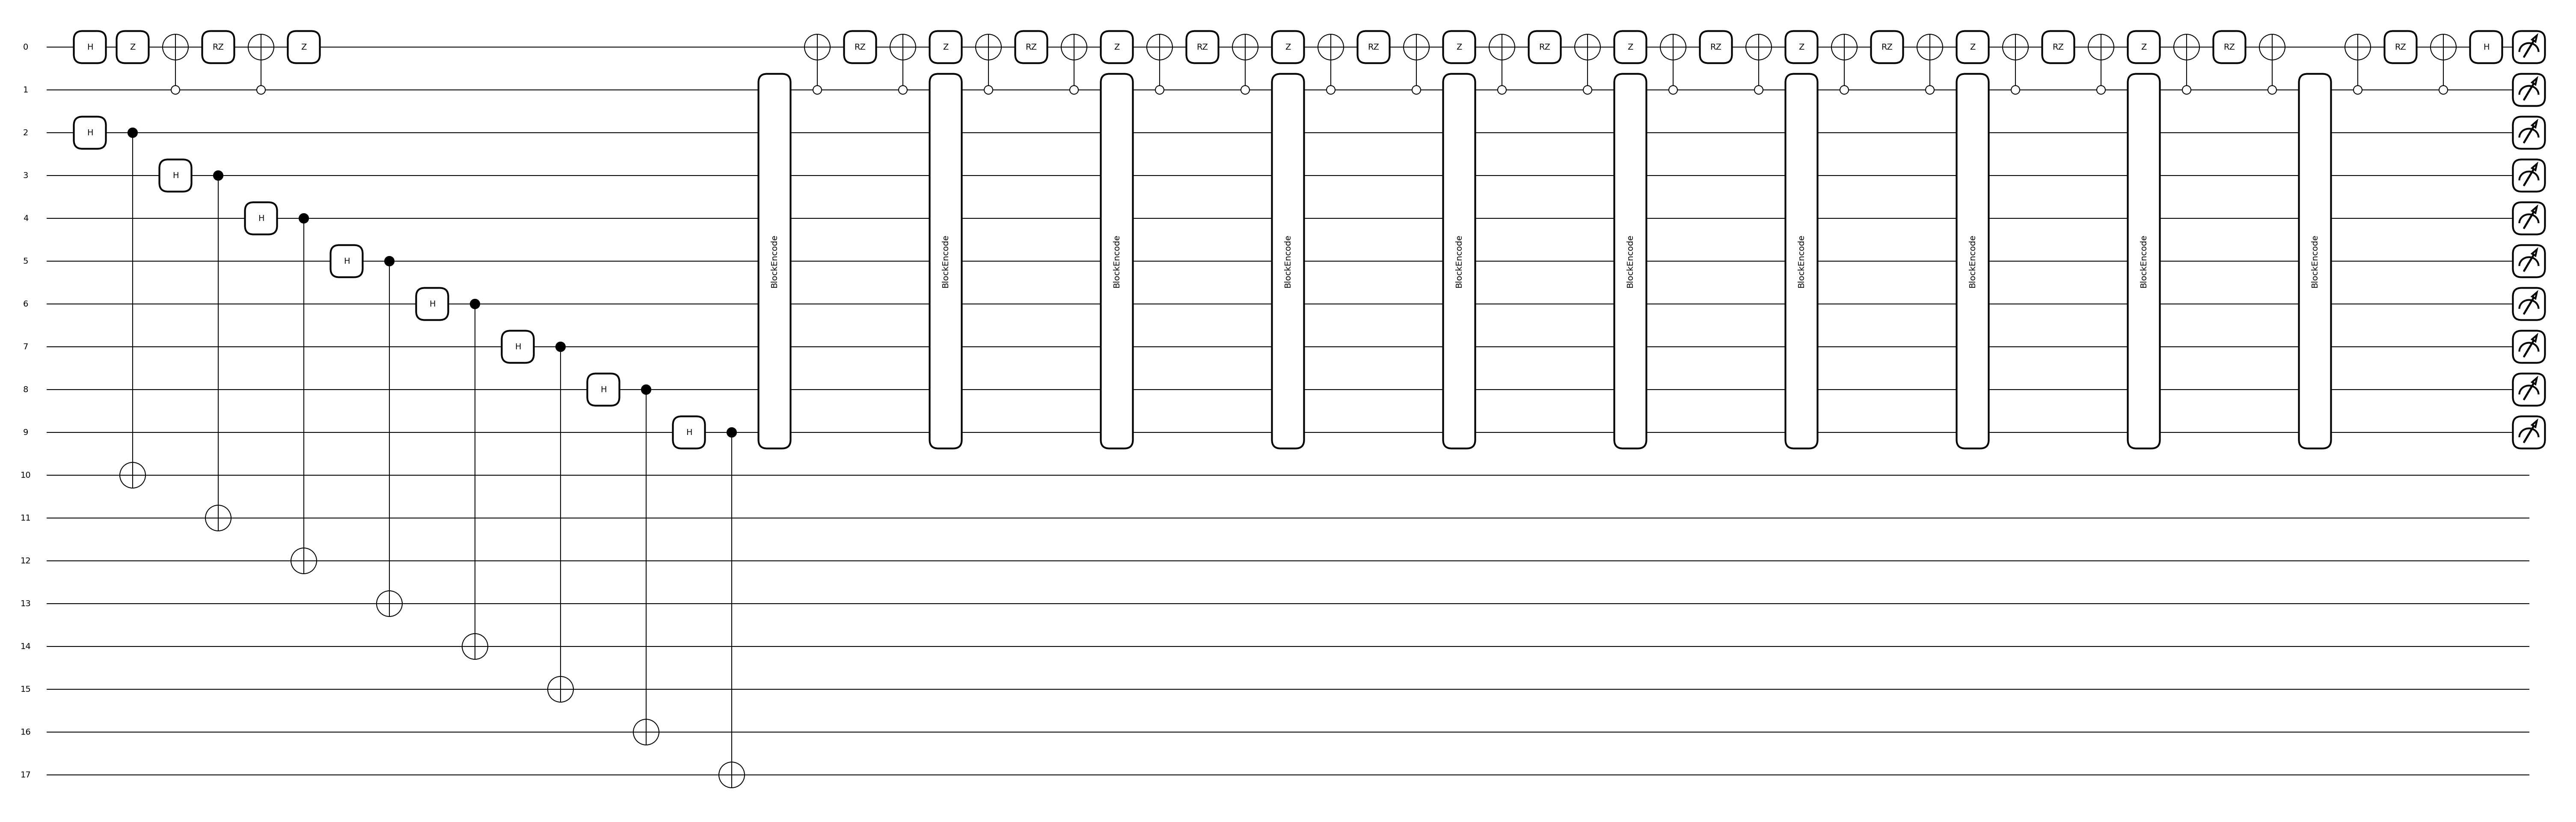

In [6]:

dev = qml.device(dev_name, wires=qbm.n_qubits({'aux','enc','sys'}))
        #dev = qml.device(dev_name, backend=backend,wires=self.n_qubits(),ibmqx_token=token)
@qml.qnode(dev)
def quantum_circuit():
    qbm._prepare()
    return qbm._measure()

qml.draw_mpl(quantum_circuit)()